In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [6]:
# import data
data = pd.read_csv('hcp_drug_prediction_data_cleaned.csv')
print(data)

      Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
0      100004           8         112.44            88.64          111.01   
1      100206           6         118.78           104.94          116.55   
2      100307           4         103.45           109.92          101.90   
3      100408           4         125.19           100.77          113.51   
4      100610           4         101.69           115.18          114.18   
5      101006           2          70.00            94.30           92.33   
6      101107           9          97.37           105.69           96.19   
7      101208           6          95.64            82.44           84.46   
8      101309           5          93.36            86.03          103.37   
9      101410           8         111.31           106.84          100.58   
10     101612           4         101.54            96.84          108.32   
11     101915           6          84.96            90.94           89.10   

In [7]:
data["Age_recoded"] = data["Age_recoded"].astype('category')
data["Gender_recoded"] = data["Gender_recoded"].astype('category')
data["sub_use"] = data["sub_use"].astype('category')

In [8]:
print(data.shape)

(1169, 75)


In [23]:
print(data)

      Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
0      100004           8         112.44            88.64          111.01   
1      100206           6         118.78           104.94          116.55   
2      100307           4         103.45           109.92          101.90   
3      100408           4         125.19           100.77          113.51   
4      100610           4         101.69           115.18          114.18   
5      101006           2          70.00            94.30           92.33   
6      101107           9          97.37           105.69           96.19   
7      101208           6          95.64            82.44           84.46   
8      101309           5          93.36            86.03          103.37   
9      101410           8         111.31           106.84          100.58   
10     101612           4         101.54            96.84          108.32   
11     101915           6          84.96            90.94           89.10   

In [24]:
# pull out continuous vars
data_con = data.iloc[:,0:71]

# standardize continuous vars
scaler = StandardScaler()
data.iloc[:,0:71] = scaler.fit_transform(data_con)

In [25]:
female_data = data[data['Gender_recoded'] == 1]
print (female_data)

       Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
2    -1.005093   -0.302713      -0.077716         0.797429        0.050741   
5    -1.002543   -1.014011      -2.069080        -0.751945       -0.897027   
7    -1.001806    0.408586      -0.542665        -1.928359       -1.676436   
10   -1.000332   -0.302713      -0.191423        -0.499998        0.686548   
11   -0.999226    0.408586      -1.178473        -1.085230       -1.216912   
13   -0.997781   -0.302713       0.471174        -1.329241       -0.020564   
17   -0.995938    1.119884       0.390210         0.503822       -1.431818   
21   -0.993756    1.475534      -1.544598        -0.887838       -1.006957   
22   -0.993388    2.186832      -1.034404        -1.243936       -0.524654   
23   -0.992282    0.052937      -0.728407        -0.470241       -0.903960   
24   -0.991574   -0.302713      -1.152278        -0.578360       -1.221863   
26   -0.990100   -1.725310       1.789224         0.775607      

In [26]:
male_data = data[data['Gender_recoded'] == 0]
print (male_data)

       Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
0    -1.006199    1.119884       0.457481        -1.313371        0.952953   
1    -1.005462    0.408586       0.834918         0.303455        1.501609   
3    -1.004725   -0.302713       1.216521        -0.110175        1.200542   
4    -1.003988   -0.302713      -0.182493         1.319178        1.266895   
6    -1.002174    1.475534      -0.439674         0.377848       -0.514751   
8    -1.001437    0.052937      -0.678399        -1.572261        0.196323   
9    -1.001069    1.119884       0.390210         0.491919       -0.079986   
12   -0.998887   -0.658362       0.155056         0.353050        0.406278   
14   -0.997044   -1.369660       0.508084        -1.019763       -2.830198   
15   -0.996675    0.052937       1.517160         0.829171        1.120323   
16   -0.996307   -1.725310      -0.438483        -0.019910       -0.800963   
18   -0.995230    1.831183      -0.296201        -0.827331      

In [27]:
#array = dataframe.values
female_X = female_data.drop(['Subject','sub_use'], axis = 1)
female_y = female_data.loc[:,'sub_use']

In [28]:
print(female_X.shape)
print(female_X.iloc[:,0:71])

(629, 73)
      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
2      -0.302713      -0.077716         0.797429        0.050741     0.066856   
5      -1.014011      -2.069080        -0.751945       -0.897027    -1.157506   
7       0.408586      -0.542665        -1.928359       -1.676436    -1.769688   
10     -0.302713      -0.191423        -0.499998        0.686548     0.474977   
11      0.408586      -1.178473        -1.085230       -1.216912     0.883098   
13     -0.302713       0.471174        -1.329241       -0.020564     0.679038   
17      1.119884       0.390210         0.503822       -1.431818     0.066856   
21      1.475534      -1.544598        -0.887838       -1.006957     0.066856   
22      2.186832      -1.034404        -1.243936       -0.524654    -1.769688   
23      0.052937      -0.728407        -0.470241       -0.903960    -0.137204   
24     -0.302713      -1.152278        -0.578360       -1.221863    -1.361567   
26     -1.725310  

In [29]:
print(female_X)

      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
2      -0.302713      -0.077716         0.797429        0.050741     0.066856   
5      -1.014011      -2.069080        -0.751945       -0.897027    -1.157506   
7       0.408586      -0.542665        -1.928359       -1.676436    -1.769688   
10     -0.302713      -0.191423        -0.499998        0.686548     0.474977   
11      0.408586      -1.178473        -1.085230       -1.216912     0.883098   
13     -0.302713       0.471174        -1.329241       -0.020564     0.679038   
17      1.119884       0.390210         0.503822       -1.431818     0.066856   
21      1.475534      -1.544598        -0.887838       -1.006957     0.066856   
22      2.186832      -1.034404        -1.243936       -0.524654    -1.769688   
23      0.052937      -0.728407        -0.470241       -0.903960    -0.137204   
24     -0.302713      -1.152278        -0.578360       -1.221863    -1.361567   
26     -1.725310       1.789

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


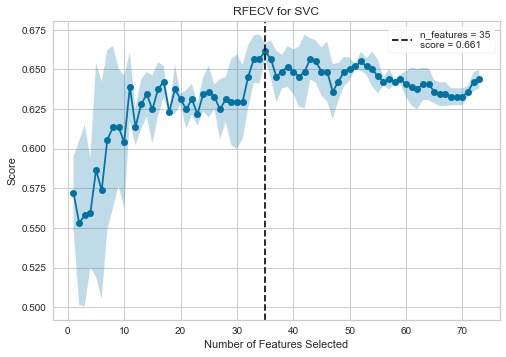

In [30]:
#from yellowbrick.features import RFECV
#feature extraction
'''model = LogisticRegression()

# The "accuracy" scoring is proportional to the number of correct classifications
# cv default is 3-fold
rfecv = RFECV(estimator=model,step=1,scoring='accuracy') 
rfecv.fit(female_X, female_y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()'''

#conda install -c districtdatalabs yellowbrick


from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV



# Create RFECV visualizer with linear SVM classifier
viz = RFECV(SVC(kernel='linear', C=1, class_weight='balanced'))
viz.fit(female_X, female_y)
viz.poof()

In [31]:
from sklearn.feature_selection import RFE

est = RFE(SVC(kernel='linear', C=1, class_weight='balanced'), 11)
est.fit(female_X,female_y)
 
est2 = RFE(SVC(kernel='linear', C=1, class_weight='balanced'), 11)
est2.fit(female_X,female_y)

RFE(estimator=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
                  decision_function_shape='ovr', degree=3,
                  gamma='auto_deprecated', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=11, step=1, verbose=0)

In [32]:
inds = est.get_support()
inds2 = est2.get_support()
AAA = female_X.columns[inds]
BBB = female_X.columns[inds2]
print(AAA)
print(BBB)

Index(['PSQI_Score', 'DDisc_SV_3yr_200', 'DDisc_SV_3yr_40K', 'VSPLOT_OFF',
       'CogFluidComp_AgeAdj', 'CogEarlyComp_AgeAdj', 'ER40ANG', 'ER40NOE',
       'AngAffect_Unadj', 'SelfEff_Unadj', 'NEOFAC_C'],
      dtype='object')
Index(['PSQI_Score', 'DDisc_SV_3yr_200', 'DDisc_SV_3yr_40K', 'VSPLOT_OFF',
       'CogFluidComp_AgeAdj', 'CogEarlyComp_AgeAdj', 'ER40ANG', 'ER40NOE',
       'AngAffect_Unadj', 'SelfEff_Unadj', 'NEOFAC_C'],
      dtype='object')


In [ ]:
#Top 11 Female Predictors 

#Pittsburgh Sleep Quality Index
#Delay Discounting: Subjective Value for $200 at 3 years
#Delay Discounting: Subjective Value for $40K at 3 years
#Variable Short Penn Line Orientation: Total Positions Off for All Trials 
#Cognition Fluid Composite
#Cognition Early Childhood Composite
#Penn Emotion Recognition Test: Number of Correct Anger Identifications
#Penn Emotion Recognition Test: Number of Correct Neutral Identifications
#NIH Toolbox Anger-Affect Survey: Unadjusted Scale Score
#NIH Toolbox Self-Efficacy Survey: Unadjusted Scale Score
#NEO-FFI Conscientiousness